# 1. Data Loading

In [1]:
STATE=34

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = os.path.join(os.getcwd(), 'dataset')
OUTPUT_DIR = os.path.join(os.getcwd(), 'output')
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
target = pd.read_csv(os.path.join(DATA_DIR, 'target.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
whole = pd.concat([train, test], axis=0, ignore_index=True)

In [4]:
train["target"] = target["coppaRisk"]
train["target"] = train["target"].astype(int)

# 2. Data Description

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

In [7]:
train.describe(include='all')

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,target
count,7000,6936,7.000000e+03,7000,4851,7000,6250,2365,2365,5872.000000,1.321000e+03,6950.000000,5768.000000,838,7000,7000,7000.000000
unique,114,119,NaN,46,26,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3,NaN
top,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low,NaN
freq,4338,5802,NaN,1828,699,6045,6189,1424,1424,NaN,NaN,NaN,NaN,536,5652,6983,NaN
mean,NaN,NaN,3.256274e+04,NaN,NaN,NaN,NaN,NaN,NaN,45.740293,3.977563e+03,57.093060,2.482490,NaN,NaN,NaN,0.099429
std,NaN,NaN,5.501431e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.361215,9.219919e+04,37.169895,1.905712,NaN,NaN,NaN,0.299258
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.038525e-03,0.533333,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.086920e+00,27.533333,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.945580e+00,52.866667,3.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,8.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,4.908375e+01,80.000000,4.000000,NaN,NaN,NaN,0.000000


In [8]:
test.describe(include='all')

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
count,3000.000000,3000,2971,3.000000e+03,3000,2119,3000,2684,1039,1039,2560.000000,574.000000,2983.000000,2486.000000,329,3000,3000
unique,NaN,89,92,NaN,45,21,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3
top,NaN,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low
freq,NaN,1821,2470,NaN,805,334,2603,2652,643,643,NaN,NaN,NaN,NaN,213,2451,2996
mean,5016.298333,NaN,NaN,3.576905e+04,NaN,NaN,NaN,NaN,NaN,NaN,46.444922,286.612276,56.044396,2.490748,NaN,NaN,NaN
std,2894.991128,NaN,NaN,4.455556e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.415285,1890.997697,36.417410,1.896230,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.007450,-1.200000,0.000000,NaN,NaN,NaN
25%,2495.750000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.121507,26.933333,0.000000,NaN,NaN,NaN
50%,4969.500000,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.186537,51.933333,3.000000,NaN,NaN,NaN
75%,7585.500000,NaN,NaN,8.250000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,44.878463,77.750000,4.000000,NaN,NaN,NaN


In [9]:
train.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,target
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,0
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,0
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,0
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,0
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,0


In [10]:
test.head()

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1,1742,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
2,806,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
3,2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
4,9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


In [11]:
train.isnull().sum()

developerCountry                      0
countryCode                          64
userRatingCount                       0
primaryGenreName                      0
downloads                          2149
deviceType                            0
hasPrivacyLink                      750
hasTermsOfServiceLink              4635
hasTermsOfServiceLinkRating        4635
isCorporateEmailScore              1128
adSpent                            5679
appAge                               50
averageUserRating                  1232
appContentBrandSafetyRating        6162
appDescriptionBrandSafetyRating       0
mfaRating                             0
target                                0
dtype: int64

In [12]:
test.isnull().sum()

ID                                    0
developerCountry                      0
countryCode                          29
userRatingCount                       0
primaryGenreName                      0
downloads                           881
deviceType                            0
hasPrivacyLink                      316
hasTermsOfServiceLink              1961
hasTermsOfServiceLinkRating        1961
isCorporateEmailScore               440
adSpent                            2426
appAge                               17
averageUserRating                   514
appContentBrandSafetyRating        2671
appDescriptionBrandSafetyRating       0
mfaRating                             0
dtype: int64

# 3. Exploratory Data Analysis

## Categorical and Numerical Cols

In [5]:
cat_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(exclude=['object']).columns

In [6]:
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: Index(['developerCountry', 'countryCode', 'primaryGenreName', 'downloads',
       'deviceType', 'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating'],
      dtype='object')
Numerical columns: Index(['userRatingCount', 'isCorporateEmailScore', 'adSpent', 'appAge',
       'averageUserRating', 'target'],
      dtype='object')


## Target Distribution

<Axes: xlabel='target'>

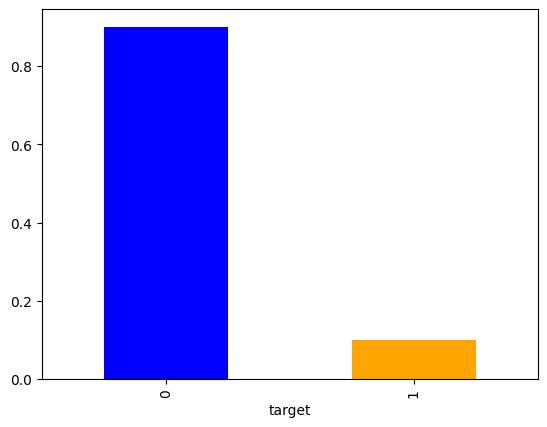

In [7]:
train['target'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

In [8]:
train['target'].value_counts()

target
0    6304
1     696
Name: count, dtype: int64

In [9]:
print(f"Percentage: {train['target'].value_counts()[0]/train.shape[0]}")

Percentage: 0.9005714285714286


## Numerical Correlations

Text(0.5, 1.0, 'Correlation Heatmap')

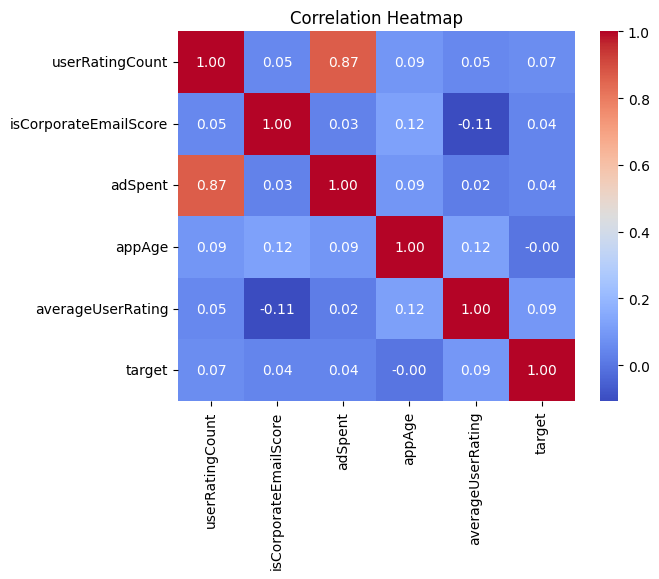

In [10]:
sns.heatmap(train[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

## Pairplot

In [11]:
# sns.pairplot(train, hue='target', palette='coolwarm')

## User Rating Count

In [12]:
train["userRatingCount"].value_counts()

userRatingCount
0        3338
1         238
6         123
5         117
7         100
         ... 
40168       1
855         1
11408       1
5588        1
4606        1
Name: count, Length: 1528, dtype: int64

In [13]:
test["userRatingCount"].value_counts()

userRatingCount
0       1414
1         89
6         68
5         52
2         45
        ... 
204        1
5527       1
61         1
1022       1
7166       1
Name: count, Length: 763, dtype: int64

## Downloads

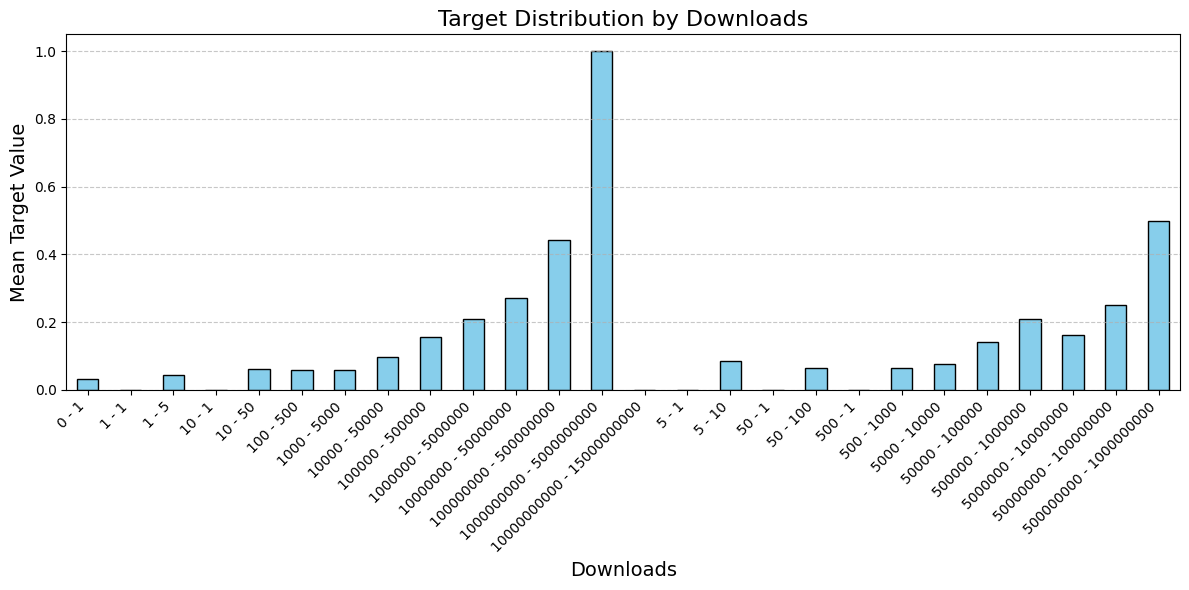

In [14]:
# Group by downloads and calculate the mean target value
downloads_target = train.groupby('downloads')['target'].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by Downloads', fontsize=16)
plt.xlabel('Downloads', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Genre

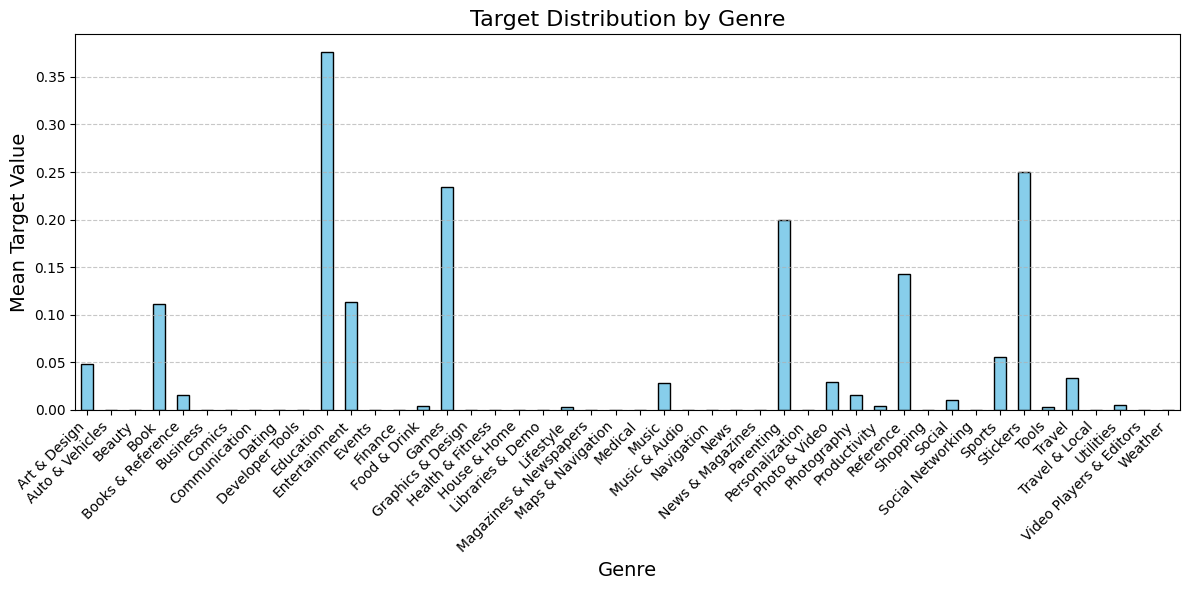

In [15]:
# Group by primaryGenreName and calculate the mean target value
downloads_target = train.groupby('primaryGenreName')['target'].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## hasPrivacyLink

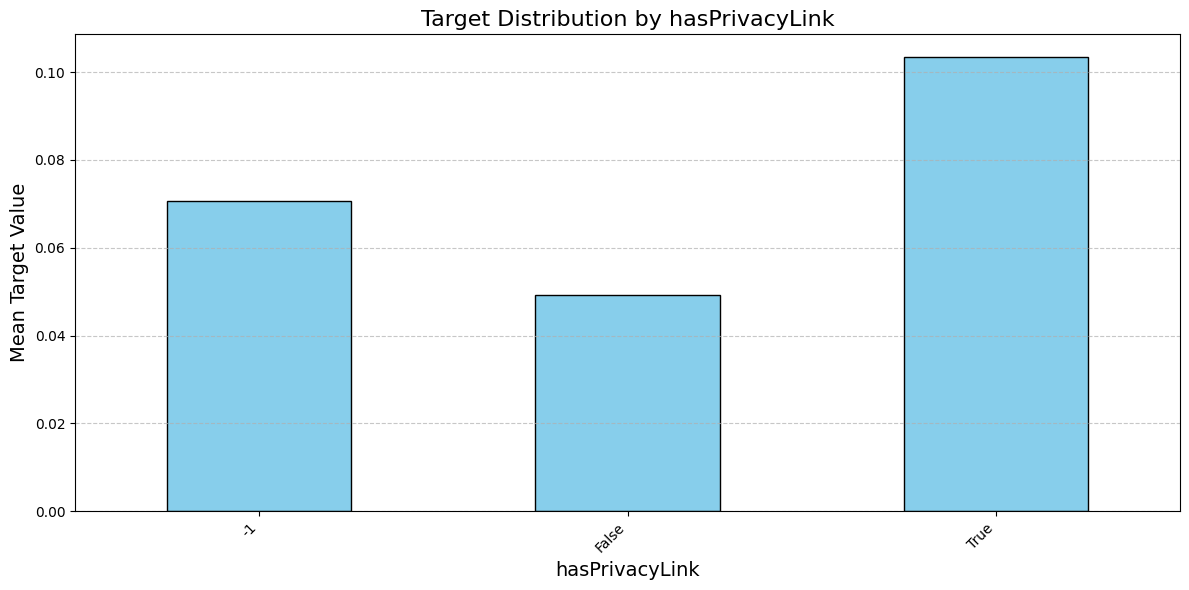

In [16]:
# Group by hasPrivacyLink and calculate the mean target value
filled_df = train.copy()
filled_df["hasPrivacyLink"] = filled_df["hasPrivacyLink"].fillna(-1)
downloads_target = filled_df.groupby("hasPrivacyLink")["target"].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by hasPrivacyLink', fontsize=16)
plt.xlabel('hasPrivacyLink', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## hasTermsOfServiceLink

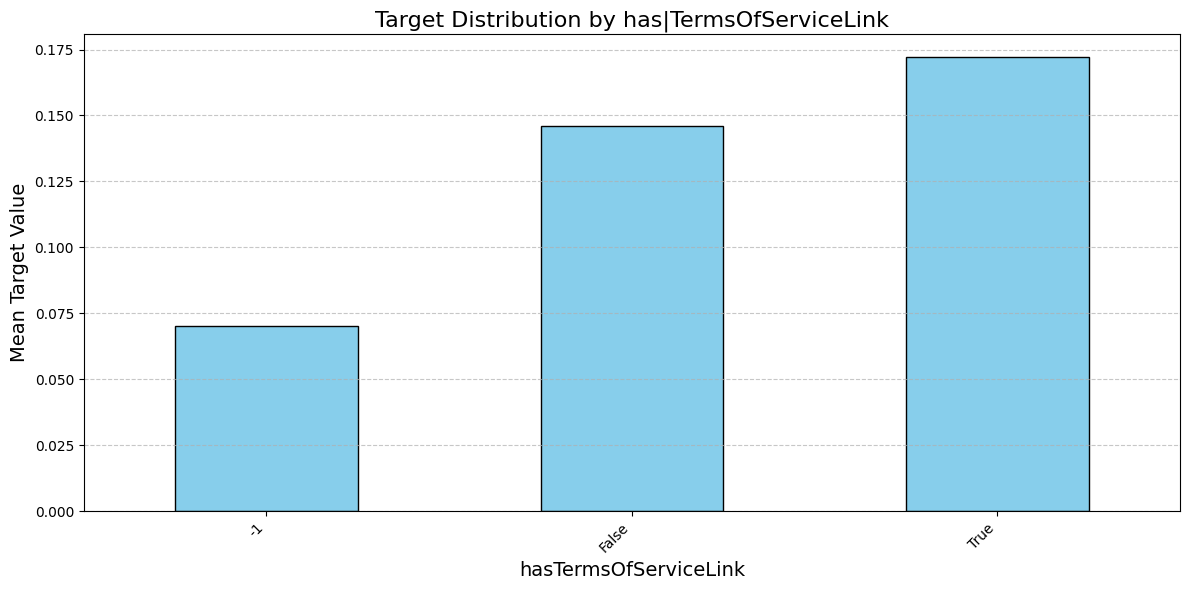

In [17]:
# Group by hasTermsOfServiceLink and calculate the mean target value
filled_df = train.copy()
filled_df["hasTermsOfServiceLink"] = filled_df["hasTermsOfServiceLink"].fillna(-1)
downloads_target = filled_df.groupby("hasTermsOfServiceLink")["target"].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by has|TermsOfServiceLink', fontsize=16)
plt.xlabel('hasTermsOfServiceLink', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## isCorporateEmailScore

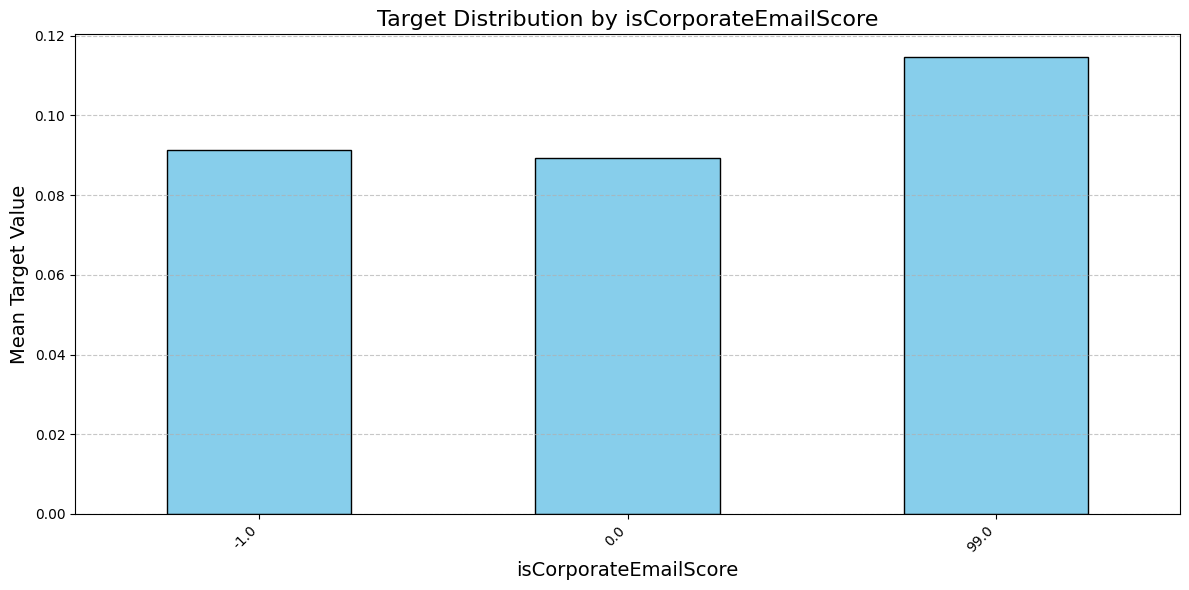

In [18]:
# Group by isCorporateEmailScore and calculate the mean target value
filled_df = train.copy()
filled_df["isCorporateEmailScore"] = filled_df["isCorporateEmailScore"].fillna(-1)
downloads_target = filled_df.groupby("isCorporateEmailScore")["target"].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by isCorporateEmailScore', fontsize=16)
plt.xlabel('isCorporateEmailScore', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

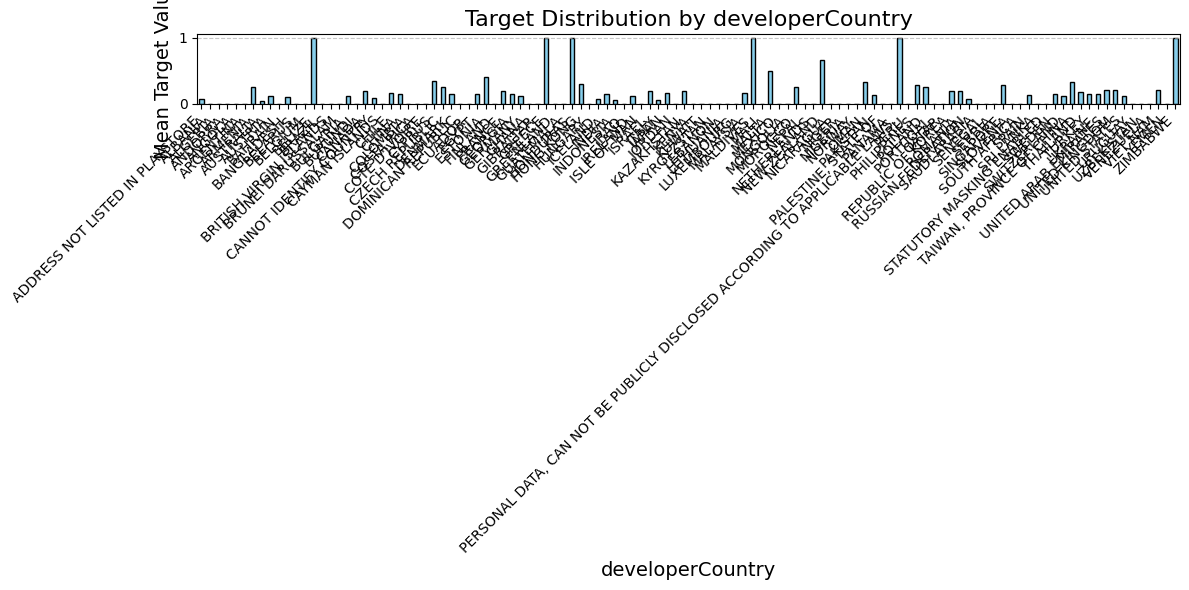

In [286]:
# Group by developerCountry and calculate the mean target value
filled_df = train.copy()
filled_df["developerCountry"] = filled_df["developerCountry"].fillna(-1)
downloads_target = filled_df.groupby("developerCountry")["target"].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by developerCountry', fontsize=16)
plt.xlabel('developerCountry', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Preprocessing

## Copy

In [19]:
preproc = train.copy()

## Dropping

too many missing values so will be dropped

In [20]:
preproc.drop("appContentBrandSafetyRating", axis=1, inplace=True)

hasTermsOfServiceLink is hasTermsOfServiceLinkRating NOT operated which is odd, they even share the same missing value locations. So we will drop one of them

In [21]:
preproc.drop("hasTermsOfServiceLinkRating", axis=1, inplace=True)

## Transform downloads to mid point

In [22]:
def parse_download_range(s):
    if pd.isna(s): return 0
    parts = s.split(' - ')
    res = (float(parts[0]) + float(parts[1])) // 2
    return res

In [23]:
preproc["downloads_bin"] = preproc["downloads"].apply(parse_download_range).astype("int64")
preproc["downloads_bin"].value_counts()

downloads_bin
0              2212
300             699
30              673
3000            591
30000           396
750             324
75              310
300000          270
3000000         248
3               225
7               201
7500            185
30000000        173
75000           169
750000          124
7500000         111
300000000        34
75000000         28
1                11
5                 9
12500000000       2
750000000         2
250               1
3000000000        1
25                1
Name: count, dtype: int64

In [24]:
preproc.drop("downloads", axis=1, inplace=True)

## Has Privacy Link

<Axes: xlabel='hasPrivacyLink'>

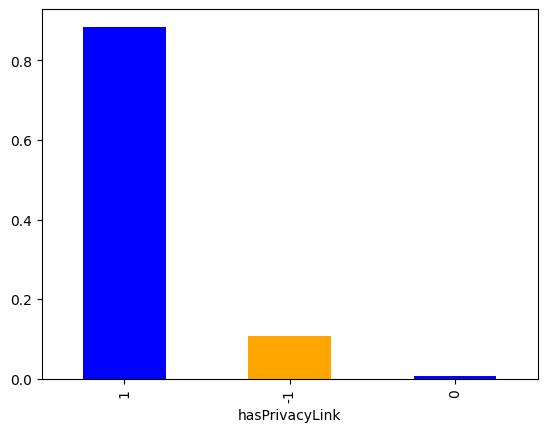

In [25]:
preproc["hasPrivacyLink"]=preproc["hasPrivacyLink"].fillna(-1)
preproc["hasPrivacyLink"] = preproc["hasPrivacyLink"].astype(int)
preproc["hasPrivacyLink"].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

## Has Terms of Service Link

<Axes: xlabel='hasTermsOfServiceLink'>

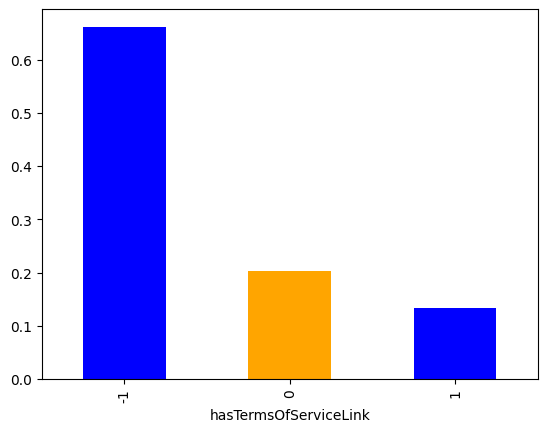

In [26]:
preproc["hasTermsOfServiceLink"]=preproc["hasTermsOfServiceLink"].fillna(-1)
preproc["hasTermsOfServiceLink"] = preproc["hasTermsOfServiceLink"].astype(int)
preproc["hasTermsOfServiceLink"].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

## isCorporateEmailScore

this is actually a boolean value of either 0 or 99 so we will convert it such

<Axes: xlabel='isCorporateEmailScore'>

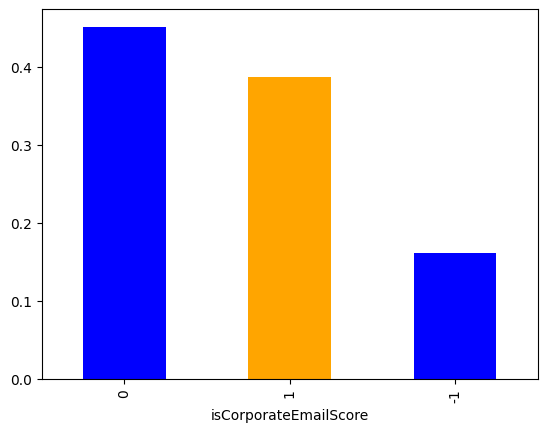

In [27]:
preproc["isCorporateEmailScore"]=preproc["isCorporateEmailScore"].fillna(-1)
preproc["isCorporateEmailScore"] = preproc["isCorporateEmailScore"].apply(lambda x: 1 if x == 99 else x).astype(int)
preproc["isCorporateEmailScore"].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

## adSpent Imputing

In [28]:
preproc["adSpent"]=preproc["adSpent"].fillna(whole["adSpent"].median())
preproc["adSpent"].value_counts()

adSpent
7.750849       5680
2.550090          1
8.060303          1
1.103175          1
5.426410          1
               ... 
118.392022        1
65.479412         1
0.023314          1
2517.752029       1
0.488427          1
Name: count, Length: 1321, dtype: int64

## appAge Imputing

In [29]:
preproc["appAge"] = preproc["appAge"].fillna(whole["appAge"].median())
preproc["appAge"].value_counts()

appAge
52.566667     54
41.000000     10
67.800000      9
3.633333       9
58.500000      9
              ..
166.900000     1
139.766667     1
55.666667      1
147.800000     1
124.033333     1
Name: count, Length: 3194, dtype: int64

## Average User Rating Imputing

if userRating count is 0 obviously Average rating is also 0, otherwise impute median

In [30]:
preproc.loc[preproc["averageUserRating"].isna(), "averageUserRating"] = preproc.loc[preproc["averageUserRating"].isna(), "userRatingCount"].apply(lambda x: 0 if x == 0 else whole["averageUserRating"].median())
preproc["averageUserRating"].value_counts()

averageUserRating
0.0    3172
4.0    2113
3.0     836
5.0     570
2.0     200
1.0     109
Name: count, dtype: int64

In [31]:
preproc.isna().sum()

developerCountry                    0
countryCode                        64
userRatingCount                     0
primaryGenreName                    0
deviceType                          0
hasPrivacyLink                      0
hasTermsOfServiceLink               0
isCorporateEmailScore               0
adSpent                             0
appAge                              0
averageUserRating                   0
appDescriptionBrandSafetyRating     0
mfaRating                           0
target                              0
downloads_bin                       0
dtype: int64

## Ordinal Mapping

### appDescriptionBrandSafetyRating

In [32]:
preproc["appDescriptionBrandSafetyRating"] = preproc["appDescriptionBrandSafetyRating"].map({'low': 0, 'medium': 1, 'high': 2}).fillna(0).astype(int)
preproc["appDescriptionBrandSafetyRating"].value_counts()

appDescriptionBrandSafetyRating
0    5652
1     754
2     594
Name: count, dtype: int64

## MFA Rating

In [33]:
preproc["mfaRating"] = preproc["mfaRating"].map({'low': 0, 'medium': 1, 'high': 2}).fillna(0).astype(int)
preproc["mfaRating"].value_counts()

mfaRating
0    6983
1       9
2       8
Name: count, dtype: int64

In [34]:
preproc["target"].groupby(preproc["mfaRating"]).mean()

mfaRating
0    0.099527
1    0.111111
2    0.000000
Name: target, dtype: float64

## Feature Engineering

### rating_per_adSpent

shows how natural an app grows

In [35]:
preproc["rating_per_adSpent"] = preproc["userRatingCount"] / preproc["adSpent"]
preproc["rating_per_adSpent"] = preproc["rating_per_adSpent"].apply(lambda x: 0 if x == np.inf else x).fillna(0)
preproc["rating_per_adSpent"].value_counts()

rating_per_adSpent
0.000000       3338
0.129018        237
0.774109        119
0.645091        117
0.903127         96
               ... 
1.122033          1
4.165620          1
50.246672         1
1698.847441       1
9430.267924       1
Name: count, Length: 1777, dtype: int64

### rate_adSpent

In [36]:
preproc["rate_adSpent"] = preproc["adSpent"] / (preproc["appAge"]+1)
preproc["rate_adSpent"].value_counts()

rate_adSpent
0.144695    45
0.184544     9
0.130266     9
0.199936     8
0.307167     8
            ..
0.297325     1
0.574137     1
3.606202     1
1.656096     1
0.061990     1
Name: count, Length: 4211, dtype: int64

### rate_ratings

In [37]:
preproc["rate_ratings"] = preproc["userRatingCount"] / (preproc["appAge"]+1)
preproc["rate_ratings"].value_counts()

rate_ratings
0.000000       3338
0.280374          3
0.093342          3
1719.793103       3
0.130678          3
               ... 
0.947368          1
0.634291          1
104.480484        1
1.853282          1
0.010650          1
Name: count, Length: 3598, dtype: int64

## One Hot Encoding

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
onehot_cols = ['developerCountry', 'countryCode', 'primaryGenreName','deviceType']

print(f"One-hot encoding columns: {onehot_cols}")

One-hot encoding columns: ['developerCountry', 'countryCode', 'primaryGenreName', 'deviceType']


In [40]:
preproc[onehot_cols] = preproc[onehot_cols].astype('str')

In [41]:
one_coder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
one_hot_encoded = one_coder.fit_transform(preproc[onehot_cols])
one_hot_df = pd.DataFrame(one_hot_encoded,columns=one_coder.get_feature_names_out(onehot_cols))
preproc.drop(onehot_cols,axis=1,inplace=True)
preproc = pd.concat([preproc,one_hot_df],axis=1)

In [42]:
preproc.head()

,userRatingCount,hasPrivacyLink,hasTermsOfServiceLink,isCorporateEmailScore,adSpent,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,target,...,primaryGenreName_Travel,primaryGenreName_Travel & Local,primaryGenreName_Utilities,primaryGenreName_Video Players & Editors,primaryGenreName_Weather,deviceType_GLOBAL,deviceType_connected-tv/ott,deviceType_smartphone,deviceType_tablet,deviceType_undetermined
0,127731,1,1,1,14.017220,160.400000,4.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,-1,1,7.750849,17.500000,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,51143,1,1,0,31.883163,30.766667,4.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1074,1,-1,1,7.750849,71.533333,4.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,17,1,-1,1,7.750849,52.400000,4.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 4.1 Combined Preprocessing Function

In [102]:
def preprocess_data(df, is_train=True):
    """
    Comprehensive preprocessing function that applies all cleaning and feature engineering steps.
    
    Parameters:
    - df: pandas DataFrame to preprocess
    - is_train: bool, whether this is training data (with target) or test data
    
    Returns:
    - Processed DataFrame ready for modeling
    """
    # Create a copy to avoid modifying the original dataframe
    processed = df.copy()
    
    # Step 1: Drop columns with too many missing values
    processed.drop("appContentBrandSafetyRating", axis=1, inplace=True)
    processed.drop("hasTermsOfServiceLinkRating", axis=1, inplace=True)
    # Step 2: Transform downloads to mid point
    def parse_download_range(s):
        if pd.isna(s): return 0
        parts = s.split(' - ')
        res = (float(parts[0]) + float(parts[1])) // 2
        return res
    
    processed["downloads_bin"] = processed["downloads"].apply(parse_download_range).astype("int64")
    
    processed.drop("downloads", axis=1, inplace=True)
    # Step 4: Handle Boolean features
    processed["hasPrivacyLink"]=processed["hasPrivacyLink"].fillna(-1)
    processed["hasPrivacyLink"] = processed["hasPrivacyLink"].astype(int)
    
    processed["hasTermsOfServiceLink"]=processed["hasTermsOfServiceLink"].fillna(-1)
    processed["hasTermsOfServiceLink"] = processed["hasTermsOfServiceLink"].astype(int)
    
    # Step 5: Convert isCorporateEmailScore (0 or 99) to binary
    processed["isCorporateEmailScore"]=processed["isCorporateEmailScore"].fillna(-1)
    processed["isCorporateEmailScore"] = processed["isCorporateEmailScore"].apply(lambda x: 1 if x == 99 else x).astype(int)
    
    # Step 6: Impute numerical features
    processed["adSpent"]=processed["adSpent"].fillna(whole["adSpent"].median())
    processed["appAge"] = processed["appAge"].fillna(whole["appAge"].median())
    processed["appAge"] = processed["appAge"].apply(lambda x: -1*x if x < 0 else x)
    
    # Step 7: Impute averageUserRating
    processed.loc[processed["averageUserRating"].isna(), "averageUserRating"] = processed.loc[processed["averageUserRating"].isna(), "userRatingCount"].apply(lambda x: 0 if x == 0 else whole["averageUserRating"].median())
    
    # Step 8: Apply ordinal mapping to categorical features
    processed["appDescriptionBrandSafetyRating"] = processed["appDescriptionBrandSafetyRating"].map({'low': 0, 'medium': 1, 'high': 2}).fillna(-1).astype(int)
    processed["mfaRating"] = processed["mfaRating"].map({'low': 0, 'medium': 1, 'high': 2}).fillna(-1).astype(int)
    
    # Step 9: Feature engineering
    # Shows how natural an app grows
    processed["rating_per_adSpent"] = processed["userRatingCount"] / processed["adSpent"]
    processed["rating_per_adSpent"] = processed["rating_per_adSpent"].apply(lambda x: 0 if x == np.inf else x).fillna(0)
    
    # Rate of ad spending per app age
    processed["rate_adSpent"] = processed["adSpent"] / (processed["appAge"]+1)
    
    # Rate of ratings per app age
    processed["rate_ratings"] = processed["userRatingCount"] / (processed["appAge"]+1)
    def rare_encoding(series: pd.Series, others_label: str = 'others') -> pd.Series:
        # Compute normalized frequency of each category (exclude NaN)
        freq = series.value_counts(normalize=True)
        # Set threshold for rare categories
        threshold = freq.nlargest(10).iloc[-1]
        # Identify rare labels
        rare_labels = freq[freq < threshold].index
        # Map series values to either itself or others_label
        encoded = series.where(~series.isin(rare_labels), other=others_label)
        # Optionally fill NaNs with others_label
        return encoded
    processed["developerCountry"] = rare_encoding(processed["developerCountry"], others_label='others')
    
    # Step 10: One-hot encoding
    onehot_cols = ['developerCountry', 'countryCode', 'primaryGenreName', 'deviceType'
                   ,'hasTermsOfServiceLink','hasPrivacyLink','isCorporateEmailScore','downloads_bin'
                   ]
    processed[onehot_cols] = processed[onehot_cols].astype('str')
    
    # Use a consistent encoder for both train and test data
    if is_train:
        # If training data, fit and transform
        global one_coder  # Store the encoder globally to use with test data later
        one_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        one_hot_encoded = one_coder.fit_transform(processed[onehot_cols])
    else:
        # If test data, use the pre-fitted encoder
        one_hot_encoded = one_coder.transform(processed[onehot_cols])
        
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_coder.get_feature_names_out(onehot_cols))
    processed.drop(onehot_cols, axis=1, inplace=True)
    processed = pd.concat([processed, one_hot_df], axis=1)
    processed = processed.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    processed = processed.loc[:, ~processed.columns.duplicated()]
    return processed

In [271]:
def base_process(df, is_train=True):
    """
    Base function to preprocess data.
    
    Parameters:
    - df: pandas DataFrame to preprocess
    - is_train: bool, whether this is training data (with target) or test data
    
    Returns:
    - base_proc DataFrame ready for modeling
    """
    base_proc = df.copy()
    base_proc.drop("appContentBrandSafetyRating", axis=1, inplace=True)
    base_proc.drop("hasTermsOfServiceLinkRating", axis=1, inplace=True)
    base_proc.drop("adSpent", axis=1, inplace=True)
    
    num_cols = base_proc.select_dtypes(exclude=['object']).columns
    for i in num_cols:
        if i != "target":
            base_proc[i] = base_proc[i].fillna(whole[i].median())
    
    def parse_download_range(s):
        if pd.isna(s): return 0
        parts = s.split(' - ')
        res = (float(parts[0]) + float(parts[1])) // 2
        return res
    
    base_proc["downloads_bin"] = base_proc["downloads"].apply(parse_download_range).astype("int64")
    
    base_proc.drop("downloads", axis=1, inplace=True)
    def rare_encoding(series: pd.Series, others_label: str = 'others') -> pd.Series:
        # Compute normalized frequency of each category (exclude NaN)
        freq = series.value_counts(normalize=True)
        # Set threshold for rare categories
        threshold = freq.nlargest(10).iloc[-1]
        # Identify rare labels
        rare_labels = freq[freq < threshold].index
        # Map series values to either itself or others_label
        encoded = series.where(~series.isin(rare_labels), other=others_label)
        # Optionally fill NaNs with others_label
        return encoded
    base_proc["developerCountry"] = rare_encoding(base_proc["developerCountry"], others_label='others')
    base_proc["appAge"] = base_proc["appAge"].apply(lambda x: -1*x if x < 0 else x)
    # Step 8: Apply ordinal mapping to categorical features
    cat_cols = base_proc.select_dtypes(include=['object']).columns
    for i in cat_cols:
        base_proc[i] = base_proc[i].fillna(-1)
        base_proc[i] = base_proc[i].astype('str')
    if is_train:
        # If training data, fit and transform
        global def_one_coder  # Store the encoder globally to use with test data later
        def_one_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        one_hot_encoded = def_one_coder.fit_transform(base_proc[cat_cols])
    else:
        # If test data, use the pre-fitted encoder
        one_hot_encoded = def_one_coder.transform(base_proc[cat_cols])
        
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=def_one_coder.get_feature_names_out(cat_cols))
    base_proc.drop(cat_cols, axis=1, inplace=True)
    base_proc = pd.concat([base_proc, one_hot_df], axis=1)
    base_proc = base_proc.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    base_proc = base_proc.loc[:, ~base_proc.columns.duplicated()]
    
    return base_proc

# 5. Modelling

In [319]:
# preproc = preprocess_data(train, is_train=True)
preproc = base_process(train, is_train=True)

## Train test split

In [45]:
from sklearn.model_selection import train_test_split

In [320]:
X = preproc.drop(columns=['target'])
y = preproc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=STATE,stratify=y)

In [321]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5600, 199), (1400, 199), (5600,), (1400,))

In [268]:
X_train.head()

,userRatingCount,appAge,averageUserRating,downloads_bin,developerCountry_ADDRESSNOTLISTEDINPLAYSTORE,developerCountry_CANNOTIDENTIFYCOUNTRY,developerCountry_CHINA,developerCountry_CYPRUS,developerCountry_FRANCE,developerCountry_HONGKONG,...,hasTermsOfServiceLink_False,hasTermsOfServiceLink_True,isCorporateEmailScore_00,isCorporateEmailScore_10,appDescriptionBrandSafetyRating_high,appDescriptionBrandSafetyRating_low,appDescriptionBrandSafetyRating_medium,mfaRating_high,mfaRating_low,mfaRating_medium
135,11883,67.600000,4.0,3000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3062,0,8.933333,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3635,0,91.766667,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6400,0,22.500000,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3137,0,69.800000,0.0,750,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## XGBoost

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [100]:
xgb_params = {
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state':STATE
}

In [106]:
xgb = XGBClassifier(**xgb_params,objective='binary:logistic',early_stopping_rounds=100,n_estimators=1000)

In [275]:
xgb.fit(X_train, y_train,eval_set=[(X_test,y_test)],  verbose=False)
y_pred = xgb.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred > 0.3).astype(int)
print(classification_report(y_test, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1261
           1       0.37      0.51      0.43       139

    accuracy                           0.87      1400
   macro avg       0.66      0.71      0.68      1400
weighted avg       0.89      0.87      0.87      1400

Accuracy: 0.8657142857142858
ROC AUC: 0.8873481706308229


In [52]:
from sklearn.model_selection import StratifiedKFold

In [317]:
# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []

# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Latih xgb
    xgb.fit(X_tr, y_tr,eval_set=[(X_test, y_test)],verbose=False)

    # Prediksi probabilitas kelas positif
    y_val_proba = xgb.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.8903
Fold  2 — ROC AUC: 0.8877
Fold  3 — ROC AUC: 0.8915
Fold  4 — ROC AUC: 0.8898
Fold  5 — ROC AUC: 0.8939

Mean ROC AUC over 10 folds : 0.8906 ± 0.0020


In [303]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=34, ...)

## Optuna Tuning

In [277]:
import optuna
from optuna.samplers import TPESampler

In [278]:
def objective(trial):

    param = {
        "verbosity": 0,
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    try_model = XGBClassifier(**param, random_state=STATE, eval_metric="auc",objective='binary:logistic'
                              , early_stopping_rounds=100, n_estimators=1000,device="cuda")
    # Siapkan StratifiedKFold dengan 10 split
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    roc_auc_scores = []

    # Loop tiap fold
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Latih xgb
        try_model.fit(X_tr, y_tr, verbose=False,eval_set=[(X_test, y_test)])

        # Prediksi probabilitas kelas positif
        y_val_proba = try_model.predict_proba(X_val)[:, 1]

        # Hitung ROC AUC
        score = roc_auc_score(y_val, y_val_proba)
        roc_auc_scores.append(score)


    # Rata‑rata dan std dari ROC AUC di 10 fold
    mean_auc = np.mean(roc_auc_scores)
    std_auc  = np.std(roc_auc_scores)
    return mean_auc - std_auc


In [279]:
optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = TPESampler(seed=1)

In [280]:
study = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2025-04-22 23:14:45,000] A new study created in memory with name: xgb
[I 2025-04-22 23:14:50,261] Trial 0 finished with value: 0.8569000756389876 and parameters: {'booster': 'gblinear', 'lambda': 2.622168410226067e-06, 'alpha': 1.492956405760975e-07, 'subsample': 0.2738708758150383, 'colsample_bytree': 0.3490081691021367}. Best is trial 0 with value: 0.8569000756389876.
[W 2025-04-22 23:15:14,294] Trial 1 failed with parameters: {'booster': 'dart', 'lambda': 2.257127620305132e-05, 'alpha': 0.0030321871516973044, 'subsample': 0.36356179978521397, 'colsample_bytree': 0.9024939491127564, 'max_depth': 3, 'min_child_weight': 8, 'eta': 2.1799092736448257e-05, 'gamma': 0.0002947939915624361, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.10259193433611967, 'skip_drop': 0.14350046489008147} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Warge\AppData\Local\Programs\Python\Python312\L

KeyboardInterrupt: 

In [68]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  57
Best trial:
  Value:  0.8773277932966851
  Params: 
    booster: gbtree
    lambda: 8.77139112524724e-07
    alpha: 0.0016848533720532693
    subsample: 0.8385834390858312
    colsample_bytree: 0.7661904497746166
    max_depth: 7
    min_child_weight: 7
    eta: 0.0009080410941562418
    gamma: 0.00012222202014451343
    grow_policy: lossguide


## Tuned Model

In [109]:
# tuned_params = trial.params
tuned_params= {
    "booster": "gbtree",
    "lambda": 0.0003612520494438275,
    "alpha": 1.6918447784590311e-06,
    "subsample": 0.8058803024923928,
    "colsample_bytree": 0.9141418045540458,
    "max_depth": 3,
    "min_child_weight": 7,
    "eta": 0.852635956484566,
    "gamma": 5.548954542447388e-06,
    "grow_policy": "depthwise"
}

In [110]:
fin_xgb = XGBClassifier(**tuned_params, random_state=STATE, eval_metric="auc",objective='binary:logistic',
                        early_stopping_rounds=100, n_estimators=1000,device="cuda")

In [146]:
fin_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred = fin_xgb.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred > 0.3).astype(int)
print(classification_report(y_test, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1261
           1       0.41      0.58      0.48       139

    accuracy                           0.87      1400
   macro avg       0.68      0.74      0.70      1400
weighted avg       0.90      0.87      0.88      1400

Accuracy: 0.8742857142857143
ROC AUC: 0.892357327460791


In [147]:
# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []

# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Latih fin_xgb
    fin_xgb.fit(X_tr, y_tr, verbose=False,eval_set=[(X_test, y_test)])

    # Prediksi probabilitas kelas positif
    y_val_proba = fin_xgb.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.8753
Fold  2 — ROC AUC: 0.8769
Fold  3 — ROC AUC: 0.8722
Fold  4 — ROC AUC: 0.8817
Fold  5 — ROC AUC: 0.8786

Mean ROC AUC over 10 folds : 0.8769 ± 0.0032


## LightGBM

In [114]:
from lightgbm import LGBMClassifier

In [115]:
lgbm = LGBMClassifier(
    objective='binary',
    metric='auc',
    random_state=STATE,
    n_estimators=1000,
    early_stopping_rounds=100,
    verbose=-1
)

In [281]:
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred = lgbm.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1261
           1       0.41      0.14      0.21       139

    accuracy                           0.89      1400
   macro avg       0.66      0.56      0.58      1400
weighted avg       0.86      0.89      0.87      1400

Accuracy: 0.8942857142857142
ROC AUC: 0.8781913406626007


In [282]:
# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []

# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Latih lgbm
    lgbm.fit(X_tr, y_tr,eval_set=[(X_test, y_test)])

    # Prediksi probabilitas kelas positif
    y_val_proba = lgbm.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.8923
Fold  2 — ROC AUC: 0.8786
Fold  3 — ROC AUC: 0.8859
Fold  4 — ROC AUC: 0.8856
Fold  5 — ROC AUC: 0.8951

Mean ROC AUC over 10 folds : 0.8875 ± 0.0058


In [283]:
def objective_lgb(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10)
    }
    try_model = LGBMClassifier(**param, random_state=STATE,
                              early_stopping_rounds=100)
    # Siapkan StratifiedKFold dengan 10 split
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    roc_auc_scores = []

    # Loop tiap fold
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Latih xgb
        try_model.fit(X_tr, y_tr,eval_set=[(X_test, y_test)])

        # Prediksi probabilitas kelas positif
        y_val_proba = try_model.predict_proba(X_val)[:, 1]

        # Hitung ROC AUC
        score = roc_auc_score(y_val, y_val_proba)
        roc_auc_scores.append(score)


    # Rata‑rata dan std dari ROC AUC di 10 fold
    mean_auc = np.mean(roc_auc_scores)
    std_auc  = np.std(roc_auc_scores)
    return mean_auc - std_auc

In [284]:
optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = TPESampler(seed=1)

In [285]:
study = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
study.optimize(objective_lgb, n_trials=100)

[I 2025-04-22 23:17:51,906] A new study created in memory with name: xgb
C:\Users\Warge\AppData\Local\Temp\ipykernel_31540\543363589.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
C:\Users\Warge\AppData\Local\Temp\ipykernel_31540\543363589.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\Warge\AppData\Local\Temp\ipykernel_31540\543363589.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_b

In [287]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.887157047171441
  Params: 
    num_leaves: 105
    max_depth: 4
    learning_rate: 0.054721480060189925
    n_estimators: 831
    min_child_samples: 79
    subsample: 0.8376648479771541
    colsample_bytree: 0.6902719723767108
    reg_alpha: 0.01150946474343417
    reg_lambda: 0.008427690336849232


In [288]:
tuned_params = {
    "num_leaves": 105,
    "max_depth": 4,
    "learning_rate": 0.054721480060189925,
    "n_estimators": 831,
    "min_child_samples": 79,
    "subsample": 0.8376648479771541,
    "colsample_bytree": 0.6902719723767108,
    "reg_alpha": 0.01150946474343417,
    "reg_lambda": 0.008427690336849232,
    "verbose":-1
}

In [289]:
fin_lgbm = LGBMClassifier(**tuned_params, random_state=STATE, eval_metric="auc",objective='binary',early_stopping_rounds=100)

In [290]:
fin_lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred = fin_lgbm.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1261
           1       0.49      0.13      0.20       139

    accuracy                           0.90      1400
   macro avg       0.70      0.56      0.58      1400
weighted avg       0.87      0.90      0.87      1400

Accuracy: 0.9
ROC AUC: 0.8898014023357048


In [291]:
# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []

# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Latih fin_lgbm
    fin_lgbm.fit(X_tr, y_tr,eval_set=[(X_test, y_test)])

    # Prediksi probabilitas kelas positif
    y_val_proba = fin_lgbm.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.8898
Fold  2 — ROC AUC: 0.8874
Fold  3 — ROC AUC: 0.8860
Fold  4 — ROC AUC: 0.8884
Fold  5 — ROC AUC: 0.8906

Mean ROC AUC over 10 folds : 0.8885 ± 0.0016


## Catboost

In [292]:
from catboost import CatBoostClassifier

In [293]:
cbmod = CatBoostClassifier(iterations=1000, depth=7, learning_rate=0.01, loss_function='Logloss', eval_metric='AUC',
                          random_seed=STATE, early_stopping_rounds=100, verbose=100,auto_class_weights="Balanced")
cbmod.fit(X_train, y_train, eval_set=(X_test, y_test))
y_pred = cbmod.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_test, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

0:	test: 0.8374705	best: 0.8374705 (0)	total: 67.6ms	remaining: 1m 7s
100:	test: 0.8794950	best: 0.8796890 (95)	total: 633ms	remaining: 5.63s
200:	test: 0.8845155	best: 0.8850005 (181)	total: 1.19s	remaining: 4.74s
300:	test: 0.8861472	best: 0.8866550 (285)	total: 1.74s	remaining: 4.04s
400:	test: 0.8875393	best: 0.8875393 (399)	total: 2.27s	remaining: 3.4s
500:	test: 0.8877960	best: 0.8880242 (486)	total: 2.78s	remaining: 2.77s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880242356
bestIteration = 486

Shrink model to first 487 iterations.
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1261
           1       0.30      0.86      0.44       139

    accuracy                           0.78      1400
   macro avg       0.64      0.82      0.65      1400
weighted avg       0.91      0.78      0.82      1400

Accuracy: 0.7842857142857143
ROC AUC: 0.8880242356471683


In [294]:
# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []

# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Latih cbmod
    cbmod.fit(X_tr, y_tr, verbose=False,eval_set=[(X_test, y_test)])

    # Prediksi probabilitas kelas positif
    y_val_proba = cbmod.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.8923
Fold  2 — ROC AUC: 0.8854
Fold  3 — ROC AUC: 0.8833
Fold  4 — ROC AUC: 0.8875
Fold  5 — ROC AUC: 0.8946

Mean ROC AUC over 10 folds : 0.8886 ± 0.0042


## Catboost Tuning

In [295]:
#Use Optuna to find the best hyperparameters
def cat_objective(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-2, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-4, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        loss_function='Logloss',
        eval_metric='AUC',
        verbose=False
    )
    # Siapkan StratifiedKFold dengan 10 split
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    roc_auc_scores = []

    # Loop tiap fold
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Latih xgb
        model.fit(X_tr, y_tr,eval_set=[(X_test, y_test)])

        # Prediksi probabilitas kelas positif
        y_val_proba = model.predict_proba(X_val)[:, 1]

        # Hitung ROC AUC
        score = roc_auc_score(y_val, y_val_proba)
        roc_auc_scores.append(score)


    # Rata‑rata dan std dari ROC AUC di 10 fold
    mean_auc = np.mean(roc_auc_scores)
    std_auc  = np.std(roc_auc_scores)
    return mean_auc - std_auc

In [296]:
optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = TPESampler(seed=1)

In [297]:
study = optuna.create_study(study_name="cat", direction="maximize", sampler=sampler)
study.optimize(cat_objective, n_trials=100)

[I 2025-04-22 23:36:39,514] A new study created in memory with name: cat
[I 2025-04-22 23:36:41,411] Trial 0 finished with value: 0.8715620136418875 and parameters: {'iterations': 475, 'learning_rate': 0.05251997291427973, 'depth': 4, 'l2_leaf_reg': 0.006516215458215695, 'bootstrap_type': 'Bayesian', 'random_strength': 2.0931628460945333e-07, 'bagging_temperature': 0.923385947687978, 'od_type': 'Iter', 'od_wait': 26}. Best is trial 0 with value: 0.8715620136418875.
[I 2025-04-22 23:37:00,490] Trial 1 finished with value: 0.8591201455954234 and parameters: {'iterations': 585, 'learning_rate': 0.026253941572909976, 'depth': 8, 'l2_leaf_reg': 0.0016854407828169394, 'bootstrap_type': 'Bayesian', 'random_strength': 0.7999391045172093, 'bagging_temperature': 0.27387593197926163, 'od_type': 'IncToDec', 'od_wait': 32}. Best is trial 0 with value: 0.8715620136418875.
[I 2025-04-22 23:37:05,727] Trial 2 finished with value: 0.8395165934630971 and parameters: {'iterations': 226, 'learning_rate': 

In [298]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.8866081733527905
  Params: 
    iterations: 694
    learning_rate: 0.0225656772593392
    depth: 7
    l2_leaf_reg: 3.5436556611563206
    bootstrap_type: Bayesian
    random_strength: 5.455259188375764e-05
    bagging_temperature: 1.7253369586592922
    od_type: IncToDec
    od_wait: 41


In [299]:
cat_params = {
    "iterations": 694,
    "learning_rate": 0.0225656772593392,
    "depth": 7,
    "l2_leaf_reg": 3.5436556611563206,
    "bootstrap_type": "Bayesian",
    "random_strength": 5.455259188375764e-05,
    "bagging_temperature": 1.7253369586592922,
    "od_type": "IncToDec",
    "od_wait": 41,
}
fin_cat = CatBoostClassifier(**cat_params, loss_function='Logloss', eval_metric='AUC',auto_class_weights='Balanced',
                          random_seed=STATE)

In [300]:
fin_cat.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=False)
y_pred = fin_cat.predict_proba(X_val)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_val, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      0.81      0.90      1008
           1       0.37      0.99      0.54       112

    accuracy                           0.83      1120
   macro avg       0.69      0.90      0.72      1120
weighted avg       0.94      0.83      0.86      1120

Accuracy: 0.83125
ROC AUC: 0.9778557256235828


In [301]:
# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []

# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Latih fin_cat
    fin_cat.fit(X_tr, y_tr,eval_set=[(X_test, y_test)])

    # Prediksi probabilitas kelas positif
    y_val_proba = fin_cat.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

0:	test: 0.8537703	best: 0.8537703 (0)	total: 5.26ms	remaining: 3.65s
1:	test: 0.8534223	best: 0.8537703 (0)	total: 10.7ms	remaining: 3.69s
2:	test: 0.8665128	best: 0.8665128 (2)	total: 15.8ms	remaining: 3.63s
3:	test: 0.8650066	best: 0.8665128 (2)	total: 21.1ms	remaining: 3.63s
4:	test: 0.8741121	best: 0.8741121 (4)	total: 26.5ms	remaining: 3.66s
5:	test: 0.8750906	best: 0.8750906 (5)	total: 31.7ms	remaining: 3.63s
6:	test: 0.8777435	best: 0.8777435 (6)	total: 36.8ms	remaining: 3.61s
7:	test: 0.8768249	best: 0.8777435 (6)	total: 42.6ms	remaining: 3.65s
8:	test: 0.8784310	best: 0.8784310 (8)	total: 47.9ms	remaining: 3.64s
9:	test: 0.8796918	best: 0.8796918 (9)	total: 52.7ms	remaining: 3.61s
10:	test: 0.8794750	best: 0.8796918 (9)	total: 58ms	remaining: 3.6s
11:	test: 0.8803764	best: 0.8803764 (11)	total: 62.4ms	remaining: 3.55s
12:	test: 0.8808557	best: 0.8808557 (12)	total: 68.3ms	remaining: 3.58s
13:	test: 0.8807302	best: 0.8808557 (12)	total: 74.3ms	remaining: 3.61s
14:	test: 0.8807

## Feature Importance

In [153]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': fin_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Fitur Terpenting:")
print(feature_importance.head(10))


Top 10 Fitur Terpenting:
                                 Feature  Importance
145           primaryGenreName_Education    0.139307
150               primaryGenreName_Games    0.108585
220  appDescriptionBrandSafetyRating_low    0.069565
146       primaryGenreName_Entertainment    0.038342
1                  isCorporateEmailScore    0.037990
190               downloads_100000500000    0.029381
0                        userRatingCount    0.026752
208                    deviceType_GLOBAL    0.026647
215                  hasPrivacyLink_True    0.024977
181                          downloads_1    0.024358


## Shap Analysis

In [123]:
import shap

c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [154]:
explainer = shap.Explainer(fin_xgb)
shap_values = explainer.shap_values(X_val)

In [155]:
shap_exp = explainer(X_val)

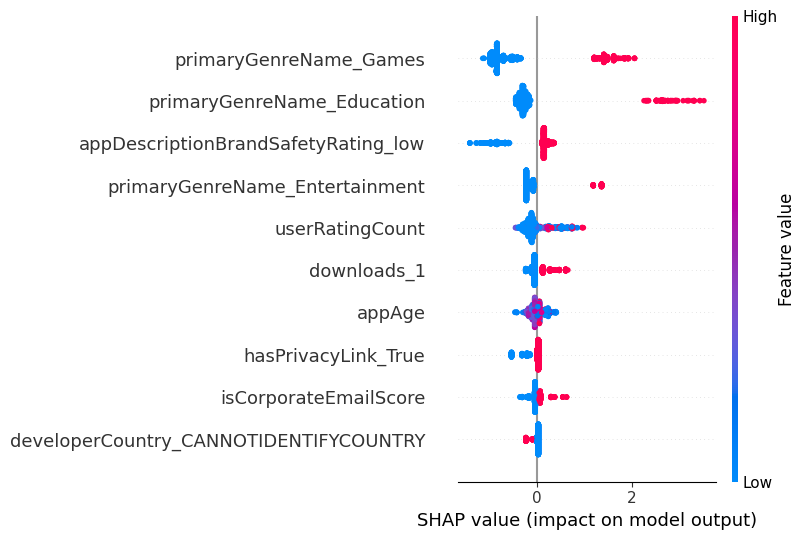

In [156]:
shap.summary_plot(shap_exp, X_val,max_display=10)

# 6. Prediction

In [306]:
fin_test = test.copy()
fin_test.drop(columns=['ID'], inplace=True)

In [309]:
fin_proc = base_process(fin_test, is_train=False)

In [310]:
fin_proc.head()

,userRatingCount,isCorporateEmailScore,appAge,averageUserRating,downloads_bin,developerCountry_ADDRESSNOTLISTEDINPLAYSTORE,developerCountry_CANNOTIDENTIFYCOUNTRY,developerCountry_CHINA,developerCountry_CYPRUS,developerCountry_FRANCE,...,hasPrivacyLink_True,hasTermsOfServiceLink_1,hasTermsOfServiceLink_False,hasTermsOfServiceLink_True,appDescriptionBrandSafetyRating_high,appDescriptionBrandSafetyRating_low,appDescriptionBrandSafetyRating_medium,mfaRating_high,mfaRating_low,mfaRating_medium
0,2,0.0,81.600000,5.0,0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0.0,24.700000,0.0,7500,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,13059,99.0,40.300000,4.0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0.0,39.233333,0.0,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,0.0,65.533333,0.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [322]:
from sklearn.linear_model import LogisticRegression

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=STATE)

train_stack_lgb = np.zeros(len(X_train))
test_stack_lgb = np.zeros(len(fin_proc))

train_stack_xgb = np.zeros(len(X_train))
test_stack_xgb = np.zeros(len(fin_proc))

train_stack_cb = np.zeros(len(X_train))
test_stack_cb = np.zeros(len(fin_proc))

for train_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    xgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
    fin_lgbm.fit(X_tr, y_tr,eval_set=[(X_val, y_val)])
    fin_cat.fit(X_tr, y_tr, verbose=False,eval_set=[(X_val, y_val)])
    
    train_stack_lgb[val_idx] = fin_lgbm.predict_proba(X_val)[:, 1]
    train_stack_cb[val_idx] = fin_cat.predict_proba(X_val)[:, 1]
    train_stack_xgb[val_idx] = xgb.predict_proba(X_val)[:, 1]
    
    test_stack_lgb += fin_lgbm.predict_proba(fin_proc)[:, 1] / n_splits
    test_stack_cb += fin_cat.predict_proba(fin_proc)[:, 1] / n_splits
    test_stack_xgb += xgb.predict_proba(fin_proc)[:, 1] / n_splits
X_train_stack = X_train.copy()
X_train_stack['lgbm'] = train_stack_lgb
X_train_stack['xgb'] = train_stack_xgb
X_train_stack['cat'] = train_stack_cb
X_test_stack = fin_proc.copy()
X_test_stack['lgbm'] = test_stack_lgb
X_test_stack['xgb'] = test_stack_xgb
X_test_stack['cat'] = test_stack_cb

In [323]:
X_train_stack.head()

,userRatingCount,isCorporateEmailScore,appAge,averageUserRating,downloads_bin,developerCountry_ADDRESSNOTLISTEDINPLAYSTORE,developerCountry_CANNOTIDENTIFYCOUNTRY,developerCountry_CHINA,developerCountry_CYPRUS,developerCountry_FRANCE,...,hasTermsOfServiceLink_True,appDescriptionBrandSafetyRating_high,appDescriptionBrandSafetyRating_low,appDescriptionBrandSafetyRating_medium,mfaRating_high,mfaRating_low,mfaRating_medium,lgbm,xgb,cat
135,11883,0.0,67.600000,4.0,3000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.430547,0.547849,0.825418
3062,0,0.0,8.933333,0.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.002984,0.002938,0.009339
3635,0,0.0,91.766667,0.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.017885,0.046505,0.158933
6400,0,0.0,22.500000,0.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.014776,0.012386,0.099597
3137,0,0.0,69.800000,0.0,750,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.012086,0.020695,0.077563


In [324]:
X_test_stack.head()

,userRatingCount,isCorporateEmailScore,appAge,averageUserRating,downloads_bin,developerCountry_ADDRESSNOTLISTEDINPLAYSTORE,developerCountry_CANNOTIDENTIFYCOUNTRY,developerCountry_CHINA,developerCountry_CYPRUS,developerCountry_FRANCE,...,hasTermsOfServiceLink_True,appDescriptionBrandSafetyRating_high,appDescriptionBrandSafetyRating_low,appDescriptionBrandSafetyRating_medium,mfaRating_high,mfaRating_low,mfaRating_medium,lgbm,xgb,cat
0,2,0.0,81.600000,5.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.017590,0.022028,0.096648
1,0,0.0,24.700000,0.0,7500,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.209963,0.245075,0.726875
2,13059,99.0,40.300000,4.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.316787,0.295711,0.734395
3,0,0.0,39.233333,0.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.028881,0.034377,0.117135
4,0,0.0,65.533333,0.0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.018884,0.023182,0.143899


In [330]:
final_model = LogisticRegression(random_state=STATE, max_iter=1000)
final_model.fit(X_train_stack[["lgbm","cat","xgb"]], y_train)

preds = final_model.predict_proba(X_test_stack[["lgbm","cat","xgb"]])[:, 1]


y_pred = final_model.predict_proba(X_train_stack[["lgbm","cat","xgb"]])[:, 1]
auc = roc_auc_score(y_train, y_pred)
print(f"AUC on validation data: {auc:.4f}")

AUC on validation data: 0.8929


In [335]:
# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []
X_train_low = X_train_stack[["lgbm","cat","xgb"]]
# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_low, y_train), 1):
    X_tr, X_val = X_train_low.iloc[train_idx], X_train_low.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    log_reg = LogisticRegression(random_state=STATE, max_iter=1000)
    log_reg.fit(X_tr, y_tr)

    # Prediksi probabilitas kelas positif
    y_val_proba = log_reg.predict_proba(X_val)[:, 1]
    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.9043
Fold  2 — ROC AUC: 0.8839
Fold  3 — ROC AUC: 0.8918
Fold  4 — ROC AUC: 0.8960
Fold  5 — ROC AUC: 0.8885

Mean ROC AUC over 10 folds : 0.8929 ± 0.0069


In [333]:
# preds = fin_cat.predict_proba(fin_proc)[:, 1]
# preds = xgb.predict_proba(fin_proc)[:, 1]
submission = pd.DataFrame({
    'ID': test['ID'],
    'coppaRisk': preds
})

# 7. Submission

In [334]:
submission.to_csv(os.path.join(OUTPUT_DIR, 'submission17s.csv'), index=False)
print("Submission file created successfully.")

Submission file created successfully.
